In [1]:
import numpy as np
import math

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import random

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [2]:
# the below model is build using the refrence of a video specified in below link
#https://www.youtube.com/watch?v=YYEJ_GUguHw
class LogisticRegression:

    def __init__(self):
        self.input_size = None
        self.weights = None
        self.bias = None
        self.activation_function = None

    def initialize_weights(size):
        # Initialize weights randomly between -0.01 and 0.01
        return np.random.uniform(-0.01, 0.01, size)

    def initialize_bias():
        # Initialize bias randomly between -0.01 and 0.01
        return np.random.uniform(-0.01, 0.01, 1)

    def sigmoid_activation(x):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-x))

    def calculate_logistic_loss(predicted, actual):
        # Calculate logistic loss
        return - (actual * math.log(predicted) + (1 - actual) * math.log(1 - predicted))

    def train(self, data, labels, learning_rate=0.1, epochs=1,
              weights_initializer=None,
              bias_initializer=None,
              activation_function=None):

        if weights_initializer is None:
            weights_initializer = LogisticRegression.initialize_weights

        if bias_initializer is None:
            bias_initializer = LogisticRegression.initialize_bias

        if activation_function is None:
            self.activation_function = LogisticRegression.sigmoid_activation

        self.input_size = np.shape(data[0])[0]
        self.weights = weights_initializer(self.input_size)
        self.bias = bias_initializer()

        for _ in range(epochs):
            for datapoint, label in zip(data, labels):
                predicted = self.predict(datapoint)

                # Calculate gradients
                weight_gradient = (predicted - label) * datapoint
                bias_gradient = predicted - label

                # Update weights and bias
                self.weights -= learning_rate * weight_gradient
                self.bias -= learning_rate * bias_gradient

    def predict(self, input_data):
        # Compute weighted sum and apply activation function
        weighted_sum = np.dot(input_data,  self.weights) + self.bias
        return self.activation_function(weighted_sum)

In [3]:
#This is only for testing the Logistic Regression model to see if its working.
# Create an instance of the logistic regression model
model = LogisticRegression()

# Train the model with input data and labels
data = np.array([[1, 1, 1], [0, 0 ,0], [1, 1, 1], [1, 1, 1], [0, 0, 0]])
labels = np.array([1, 0, 1, 1, 0])
model.train(data, labels)

# Make predictions using the trained model
predictions = [model.predict(dp) for dp in data]
print(predictions)

[array([0.61172315]), array([0.50762416]), array([0.61172315]), array([0.61172315]), array([0.50762416])]


In [4]:
# Read data from csv file using Pandas lib
blob_df = pd.read_csv("blobs400.csv")
circle_df = pd.read_csv("circles500.csv")


In [5]:
#label and feature extraction from blob and circle file

#for Blob
blob_y = blob_df['Class'].values
del blob_df['Class']
blob_X = blob_df.values

#for circle(same steps as blob)
circle_y = circle_df['Class'].values
del circle_df['Class']
circle_X = circle_df.values

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
blob_X_train, blob_X_test, blob_y_train, blob_y_test = train_test_split(blob_X, blob_y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model_blob = LogisticRegression()

# Train the model with input data and labels
model_blob.train(blob_X_train, blob_y_train, epochs=250, learning_rate=0.05)

In [10]:
blob_predictions = model_blob.predict(blob_X_test)

# Make predictions on the test set
threshold = 0.5
binary_predictions = [1 if pred >= threshold else 0 for pred in blob_predictions]

# Evaluation
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(blob_y_test, binary_predictions)
print("Accuracy on blob dataset:", accuracy)


Accuracy on blob dataset: 0.975


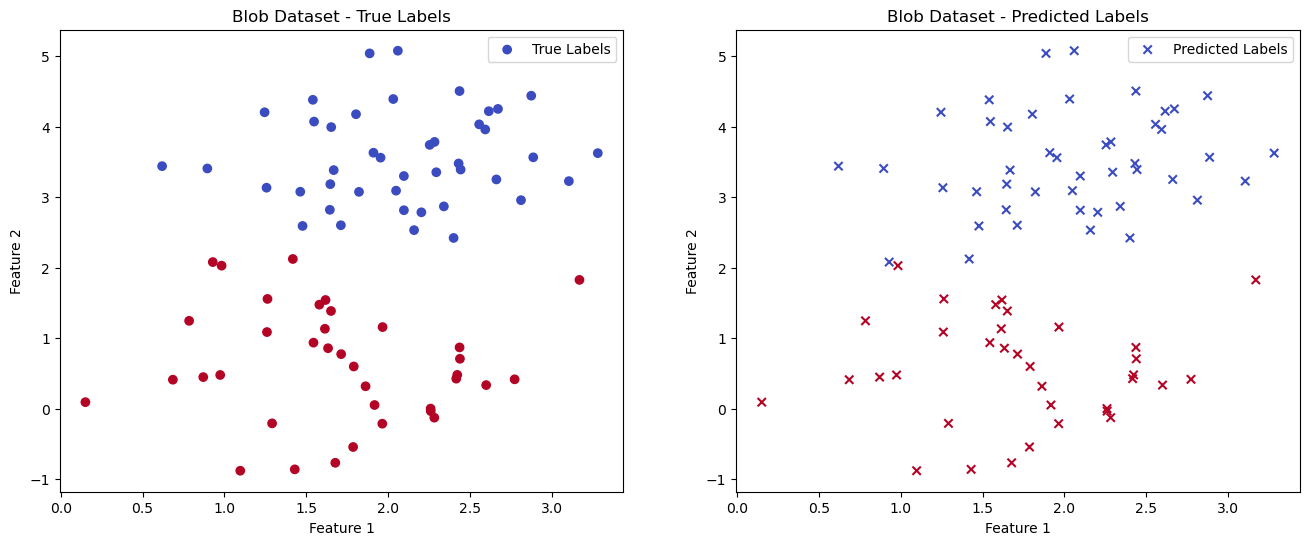

In [11]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the blob dataset with true labels
axs[0].scatter(blob_X_test[:, 0], blob_X_test[:, 1], c=blob_y_test, cmap='coolwarm', marker='o', label='True Labels')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Blob Dataset - True Labels')
axs[0].legend()

# Plotting the blob dataset with predicted labels
axs[1].scatter(blob_X_test[:, 0], blob_X_test[:, 1], c=binary_predictions, cmap='coolwarm', marker='x', label='Predicted Labels')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Blob Dataset - Predicted Labels')
axs[1].legend()

plt.show()

In [12]:
# Splitting the data into train and test sets
circle_X_train, circle_X_test, circle_y_train, circle_y_test = train_test_split(circle_X, circle_y, test_size=0.2, random_state=42)

# Create an instance of the logistic regression model
model_circle = LogisticRegression()

# Train the model with input data and labels
model_circle.train(circle_X_train, circle_y_train, epochs=250, learning_rate=0.05)


In [13]:
# Make predictions on the test set
circle_predictions = [model_circle.predict(dp) for dp in circle_X_test]

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
binary_predictions_circle = [1 if pred >= threshold else 0 for pred in circle_predictions]

# Evaluation
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy_circle = accuracy_score(circle_y_test, binary_predictions_circle)
print("Accuracy on circles dataset:", accuracy_circle)

Accuracy on circles dataset: 0.975


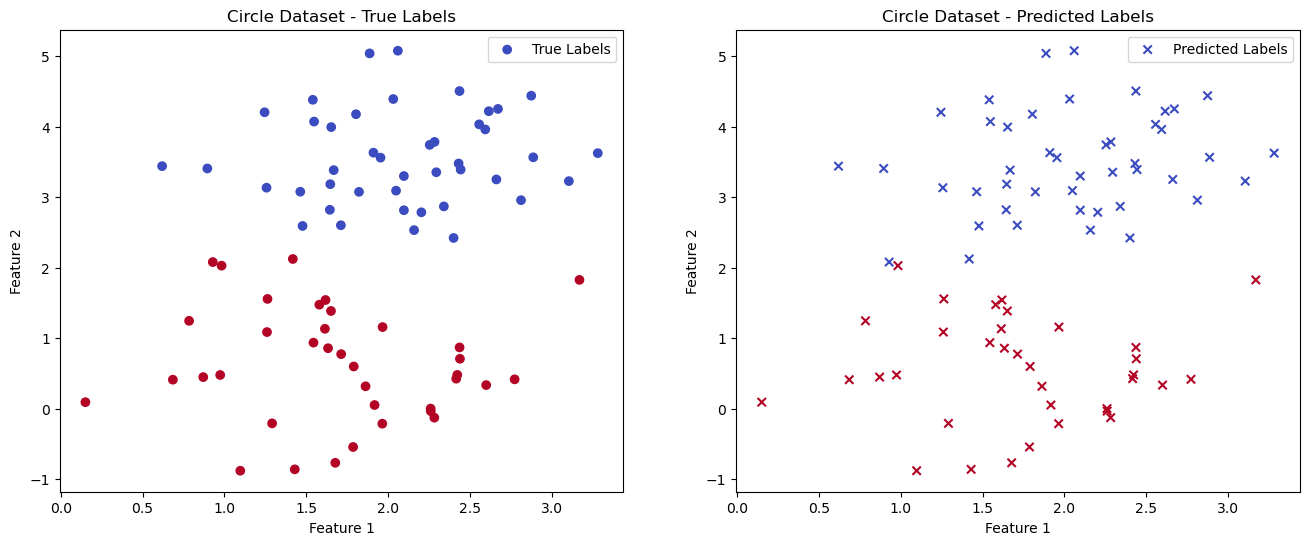

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plotting the circle dataset with true labels
axs[0].scatter(circle_X_test[:, 0], circle_X_test[:, 1], c=circle_y_test, cmap='coolwarm', marker='o', label='True Labels')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')
axs[0].set_title('Circle Dataset - True Labels')
axs[0].legend()

# Plotting the circle dataset with predicted labels
axs[1].scatter(circle_X_test[:, 0], circle_X_test[:, 1], c=binary_predictions, cmap='coolwarm', marker='x', label='Predicted Labels')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Circle Dataset - Predicted Labels')
axs[1].legend()

plt.show()

In [15]:
def initialize_weights(size):
    return np.random.normal(0, 0.2, size)

In [16]:
def initialize_biases(size):
    return np.random.normal(0, 0.2, size)

In [17]:
def sigmoid_activation(x):
    return np.where(x >= 0, (1 / (1 + np.exp(-x))), (np.exp(x) / (1 + np.exp(x))))

In [18]:
def sigmoid_derivative(x):
    return sigmoid_activation(x) * (1 - sigmoid_activation(x))

In [19]:
def calculate_logistic_loss(predicted, actual, epsilon=sys.float_info.epsilon):
    return - (actual * np.log(predicted + epsilon) + (1 - actual) * np.log(1 - predicted + epsilon))

In [20]:
def transpose_matrix(x):
    if len(np.shape(x)) == 1:
        return x.reshape(1, -1)
    return np.transpose(x)

In [21]:
def normalize_feature(x, x_min, x_max, new_min=-1, new_max=1):
    return ((x - x_min) / (x_max - x_min)) * (new_max - new_min) + new_min

In [22]:
def construct_normalizer(data, normalize):
    t_data = transpose_matrix(data)
    x_min = [min(d_vector) for d_vector in t_data]
    x_max = [max(d_vector) for d_vector in t_data]

    return lambda x: np.array([normalize(xx, x_min[idx], x_max[idx]) for idx, xx in enumerate(x)])

In [23]:
def forward_propagation(weights, biases, activation, data):
    activations = [data]
    z_values = []
    for w, b in zip(weights, biases):
        z = np.dot(w, activations[-1]) + b
        z_values.append(z)
        activations.append(activation(z))

    return activations, z_values

In [24]:
def update_output_layer(weights, biases, activation_deriv, a_values, labels, alpha):
    dL_dz = a_values[-1] - labels
    dz_dw = a_values[-2]
    dz_db = 1
    dz_da_prev = weights[-1]

    dL_dw = dL_dz.dot(transpose_matrix(dz_dw))
    dL_db = dL_dz * dz_db
    dL_da_prev = transpose_matrix(dz_da_prev).dot(dL_dz)

    weights[-1] -= alpha * dL_dw
    biases[-1] -= alpha * dL_db

    return weights, biases, dL_da_prev

In [25]:
def update_hidden_layer(weights, biases, activation_deriv, a_values, z_values, alpha, dL_da_prev):
    da_prev_dz_prev = activation_deriv(z_values[-2])
    dL_dz_prev = dL_da_prev * da_prev_dz_prev
    dz_prev_dw_prev = a_values[-3]
    dz_prev_db_prev = 1

    dL_dw_prev = dL_dz_prev[:, np.newaxis].dot(transpose_matrix(dz_prev_dw_prev))
    dL_db_prev = dL_dz_prev * dz_prev_db_prev

    weights[-2] -= alpha * dL_dw_prev
    biases[-2] -= alpha * dL_db_prev

    return weights, biases

In [26]:
# Define the class
class YourShallowNetwork:

    def __init__(self):
        self.input_size = None
        self.weights = None
        self.biases = None
        self.activation = None
        self.activation_derivative = None
        self.loss_function = None
        self.normalizer = None

    def train(self, data, labels, k=10, alpha=0.5, stop_early=False, stop_avg_loss=0.01, n_loss_avg=10,
              iterations=None,
              normalize=None):

        if iterations is None:
            iterations = len(data)

        if normalize is None:
            normalize = self.normalize_feature

        self.input_size = np.shape(data[0])[0]
        self.weights = [initialize_weights((k, self.input_size)), initialize_weights((1, k))]
        self.biases = [initialize_biases(k), initialize_biases(1)]
        self.activation = np.vectorize(sigmoid_activation)
        self.activation_derivative = np.vectorize(sigmoid_derivative)
        self.loss_function = np.vectorize(calculate_logistic_loss)
        alpha = float(alpha)
        self.normalizer = construct_normalizer(data, normalize)

        losses = []
        data_list = list((zip(data, labels)))
        for iter in range(iterations):
            [dp, label] = random.choice(data_list)

            a_values, z_values = forward_propagation(self.weights, self.biases, self.activation, dp)
            if stop_early:
                loss = self.loss_function(a_values[-1], label)[0]
                if len(losses) == n_loss_avg:
                    avg_loss = sum(losses) / len(losses)
                    if avg_loss < stop_avg_loss:
                        print(f"Stopped after {iter} iterations")
                        break
                losses.append(loss)
                losses = losses[-n_loss_avg:]

            # Output Layer Backpropagation
            self.weights, self.biases, dL_da_prev = update_output_layer(self.weights, self.biases, self.activation_derivative, a_values, label, alpha)

            # Hidden Layer Backpropagation
            self.weights, self.biases = update_hidden_layer(self.weights, self.biases, self.activation_derivative, a_values, z_values, alpha, dL_da_prev)

    def predict(self, in_dp):
        a_values, _ = forward_propagation(self.weights, self.biases, self.activation, in_dp)
        return a_values[-1]

In [31]:
# Instantiate YourShallowNetwork
snn_blobs = YourShallowNetwork()

# Train the network with input data and labels
snn_blobs.train(blob_X_train, blob_y_train, k=3, alpha=0.5, iterations=5000, stop_early=True, stop_avg_loss=0.01, n_loss_avg=5, normalize=normalize_feature)


Stopped after 390 iterations


In [32]:
# Predict using the trained model on the test data
predictions = [snn_blobs.predict(dp) for dp in blob_X_test]

# Convert probabilities to binary predictions using a threshold
threshold = 0.5
binary_predictions = [1 if pred >= threshold else 0 for pred in predictions]

# Calculate accuracy
accuracy = accuracy_score(blob_y_test, binary_predictions)
print("Accuracy on blob dataset:", accuracy)

Accuracy on blob dataset: 0.9625


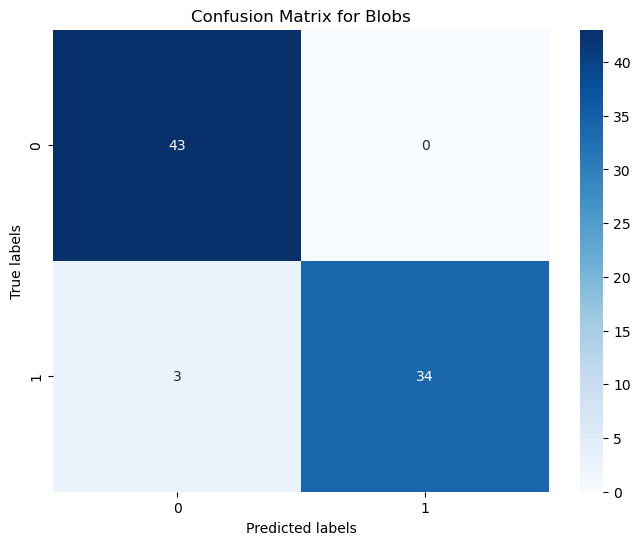

In [34]:
# Confusion matrix
import seaborn as sns
conf_matrix = confusion_matrix(blob_y_test, binary_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Blobs')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

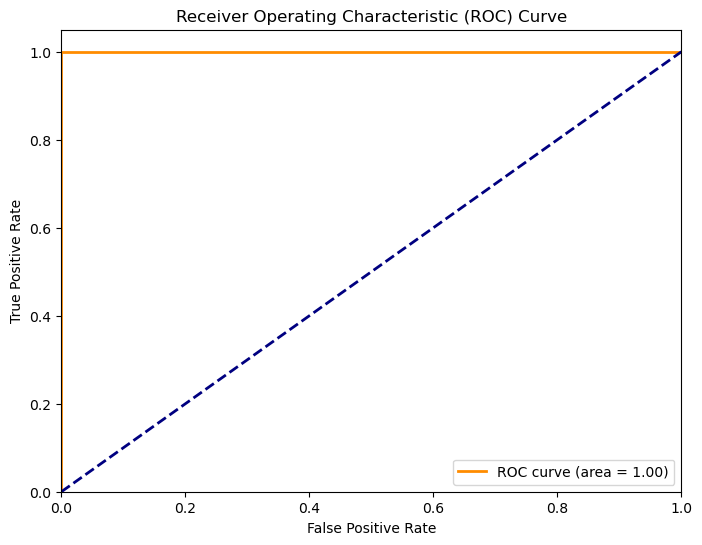

In [35]:
fpr, tpr, thresholds = roc_curve(blob_y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [43]:
# Initialize an empty list to store training losses for the circle dataset
circle_losses = []

# Instantiate YourShallowNetwork for circle dataset
snn_circle = YourShallowNetwork()

# Train the model with input data and labels for the circle dataset
snn_circle.train(circle_X_train, circle_y_train, k=3, alpha=0.5, iterations=5000, stop_early=True, stop_avg_loss=0.01, n_loss_avg=5, normalize=normalize_feature)


Stopped after 433 iterations


In [44]:
circle_predictions = [snn_circle.predict(dp) for dp in circle_X_test]
binary_predictions_circle = [1 if pred >= 0.5 else 0 for pred in circle_predictions]

# Calculate accuracy for circle dataset
accuracy_circle = accuracy_score(circle_y_test, binary_predictions_circle)
print("Accuracy on circle dataset:", accuracy_circle)

Accuracy on circle dataset: 0.9625


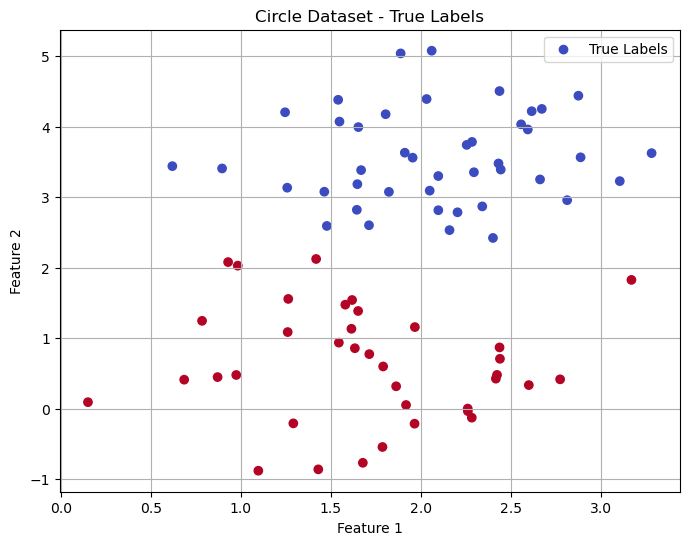

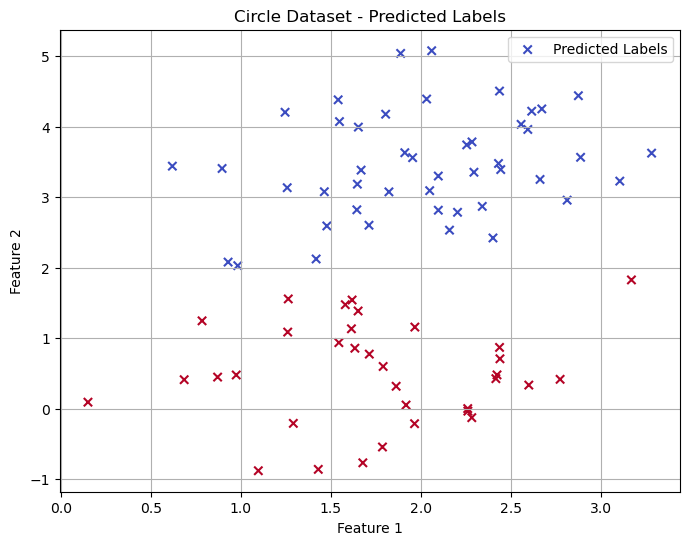

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(circle_X_test[:, 0], circle_X_test[:, 1], c=circle_y_test, cmap='coolwarm', marker='o', label='True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circle Dataset - True Labels')
plt.legend()
plt.grid(True)
plt.show()

# Create a scatter plot to visualize the circle dataset with predicted labels
plt.figure(figsize=(8, 6))
plt.scatter(circle_X_test[:, 0], circle_X_test[:, 1], c=binary_predictions_circle, cmap='coolwarm', marker='x', label='Predicted Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Circle Dataset - Predicted Labels')
plt.legend()
plt.grid(True)
plt.show()

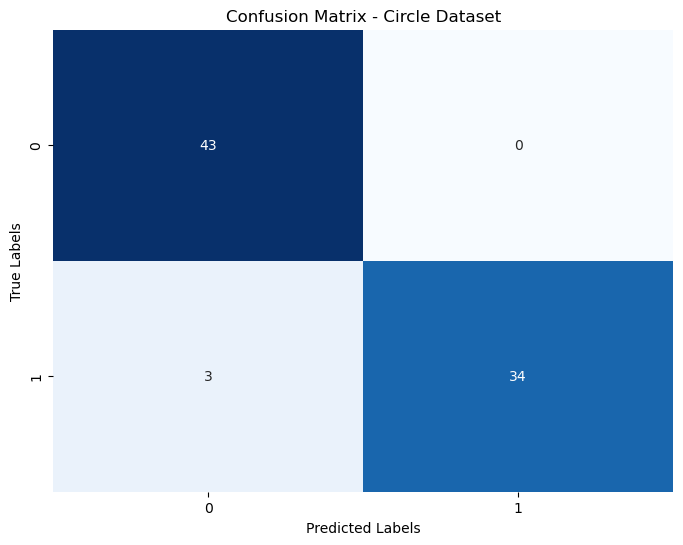

In [46]:
conf_matrix = confusion_matrix(circle_y_test, binary_predictions_circle)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Circle Dataset')
plt.show()
